# M1 MIAGE SBD
## Kickstarter for the lab session "Differential privacy and the Laplace Mechanism"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import seaborn as sns

## Loading data

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship', 'race',
         'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'income']

adult = pd.read_csv(url, sep=',', header=None, names=names, na_values='?', engine='python', skipinitialspace=True)

adult.dropna(inplace=True)

adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Performing queries

## H1 Distribution (histogram) of the education level.

In [5]:
adult['education'].value_counts()


education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='education'>

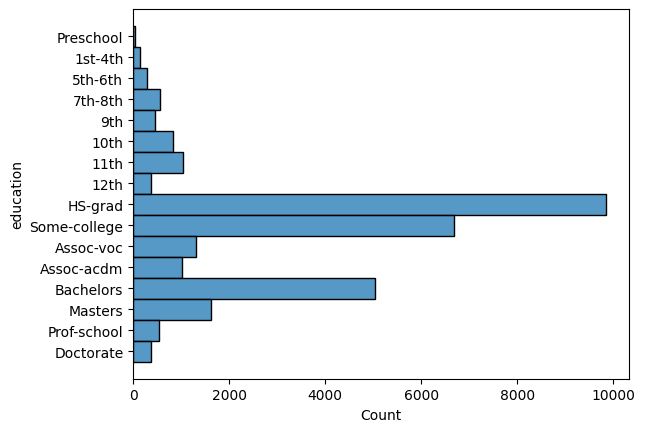

In [6]:
sns.histplot(data=adult.sort_values(by='education-num'), y='education')

### Another query: average age of people with income over 50K

In [5]:
adult[adult['income'] == '>50K']['age'].mean()

np.float64(43.95911028236548)

### A histogram query: distribution of the education level

education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

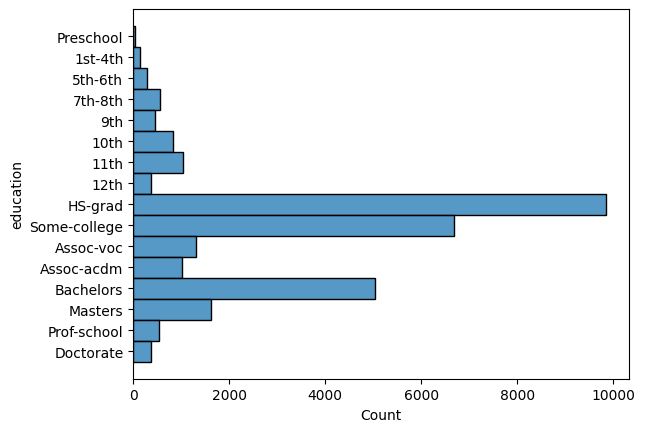

### Another histogram query: distribution of working hours per week for people with income over 50K

In [7]:
pd.cut(adult[adult['income'] == '>50K']['hours-per-week'], bins=10).value_counts()

(30.4, 40.2]     3478
(40.2, 50.0]     2290
(59.8, 69.6]      751
(50.0, 59.8]      435
(69.6, 79.4]      151
(20.6, 30.4]      137
(10.8, 20.6]      114
(79.4, 89.2]       73
(89.2, 99.0]       41
(0.902, 10.8]      38
Name: hours-per-week, dtype: int64

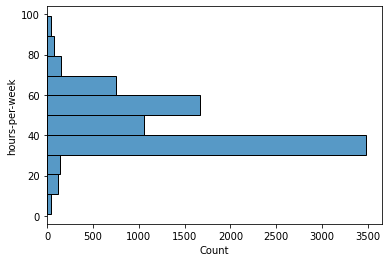

In [8]:
sns.histplot(data=adult[adult['income'] == '>50K'], y='hours-per-week', bins=10);

## How to plot ? By the example...

### Comparing with numpy's Laplace

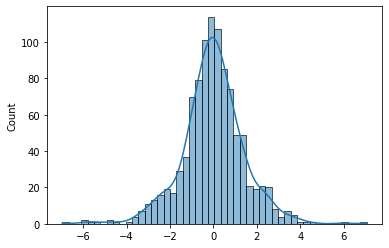

In [9]:
lap = np.random.laplace(loc=0, scale=1, size=1000)

sns.histplot(lap, kde=True);

Kolmogorov-Smirnov test

In [10]:
lap2 = np.random.laplace(loc=0.2, scale=1, size=1000)

ks_2samp(lap, lap2)

KstestResult(statistic=0.105, pvalue=3.209982841805882e-05)

### Another plot

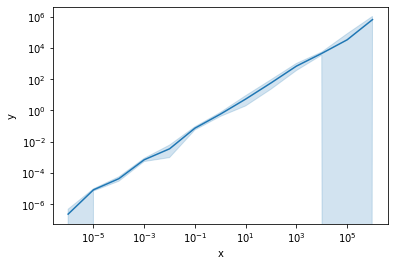

In [11]:
x = np.logspace(-6, 6, num=13)  # [10^-6, 10^-5, ... 10^6]
x3 = np.repeat(x, 3)  # repeat each value 3 times

y = np.random.random(size=len(x3)) * x3

ax = sns.lineplot(x='x', y='y', estimator='mean', ci='sd', data=pd.DataFrame({'x': x3, 'y': y}))
ax.set(xscale='log', yscale='log');

### Yet another plot

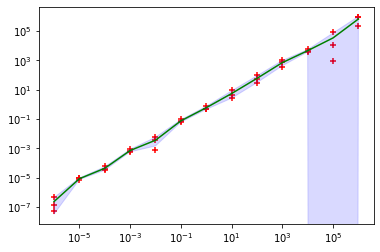

In [12]:
# group repeated values over the same dimension: 
# [[10^-6, 10^-6, 10^-6], [10^-5, 10^-5, 10^-5], ...]
y3 = y.reshape(-1, 3)

# compute average and std for each repeated x value
y_avg = np.mean(y3, axis=1)
y_err = np.std(y3, axis=1)

_, ax = plt.subplots(1)
ax.set(xscale='log', yscale='log')
ax.scatter(x3, y, color='red', marker='+')
ax.plot(x, y_avg, color='green')
ax.fill_between(x, y_avg+y_err, y_avg-y_err, color='blue', alpha=0.15);